In [173]:
import pyxdf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
import os

In [174]:
channels = ['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7'
            , 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz'
            , 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'ACC_X', 'ACC_Y', 'ACC_Z']
removed_channels = ['Fp1', 'F8', 'F7', 'Fp2', 'F3', 'F4']
# TODO ADD AUX WHEN CONNECTED
columns = channels
frequencies_main = ['8.18', '9', '10', '11.25', '12.85', '15']
frequencies = ['8.18_sin_h1','8.18_cos_h1','8.18_sin_h2','8.18_cos_h2','8.18_sin_h3','8.18_cos_h3',
               '9_sin_h1', '9_cos_h1','9_sin_h2', '9_cos_h2','9_sin_h3', '9_cos_h3',
               '10_sin_h1','10_cos_h1','10_sin_h2','10_cos_h2','10_sin_h3','10_cos_h3',
               '11.25_sin_h1','11.25_cos_h1','11.25_sin_h2','11.25_cos_h2','11.25_sin_h3','11.25_cos_h3',
               '12.85_sin_h1','12.85_cos_h1','12.85_sin_h2','12.85_cos_h2','12.85_sin_h3','12.85_cos_h3',
               '15_sin_h1', '15_cos_h1', '15_sin_h2', '15_cos_h2', '15_sin_h3', '15_cos_h3'
               ]



In [175]:

def plot_single(df,df_ts, column):
    axis = plt.subplot()
    axis.plot(df_ts['time'], df[column])
    axis.set_title(column)
    plt.show()

def plot_eeg(df, df_ts):
    df.columns = columns
    index = 0
    for i in range(32):
        color = 'blue'
        index += 1
        if channels[i] in removed_channels:
            color = 'red'

        axis = plt.subplot()
        axis.plot(df_ts['time'], df[channels[i]], color=color)
        axis.set_title(channels[i])
        plt.show()





In [176]:
def load_frequencies(path = '../data/ERPSpellerDataV1/ERPSpellerDataA30Sec8-18hz'):
    data, header = pyxdf.load_xdf(path+'/dejittered-unity-frequencies-Yformat.xdf')
    df_stream = None
    df_stream_ts = None
    for s in data:
        stream = s
        y = stream['time_series']
        df_stream = pd.DataFrame(y)
        df_stream_ts = pd.DataFrame(stream['time_stamps'])
        df_stream_ts.columns = ['time']
        df_stream.columns = frequencies
    return df_stream, df_stream_ts

def load_eeg(path = '../data/ERPSpellerDataV1/ERPSpellerDataA30Sec8-18hz'):
    data, header = pyxdf.load_xdf(path+'/dejittered-eeg.xdf')
    df_stream = None
    df_stream_ts = None
    for s in data:
        stream = s
        y = stream['time_series']
        df_stream = pd.DataFrame(y)
        df_stream_ts = pd.DataFrame(stream['time_stamps'])
        df_stream_ts.columns = ['time']
        df_stream.columns = channels
    return df_stream, df_stream_ts

def load_eeg_iir(path = '../data/ERPSpellerDataV1/ERPSpellerDataA30Sec8-18hz'):
    data, header = pyxdf.load_xdf(path+'/dejittered-iir-3order-7to110-eeg.xdf')
    df_stream = None
    df_stream_ts = None
    for s in data:
        stream = s
        y = stream['time_series']
        df_stream = pd.DataFrame(y)
        df_stream_ts = pd.DataFrame(stream['time_stamps'])
        df_stream_ts.columns = ['time']
        df_stream.columns = channels
    return df_stream, df_stream_ts

def load_eeg_and_freq(path = '../data/ERPSpellerDataV1/ERPSpellerDataA30Sec8-18hz'):
    data, header = pyxdf.load_xdf(path+'/dejittered-shifted43ms-decimate2-eeg-and-dejittered-unity-freq.xdf')
    df_stream = None
    df_stream_ts = None
    for s in data:
        stream = s
        y = stream['time_series']
        df_stream = pd.DataFrame(y)
        df_stream_ts = pd.DataFrame(stream['time_stamps'])
        df_stream_ts.columns = ['time']
        df_stream.columns = frequencies+ channels
    return df_stream, df_stream_ts

In [177]:
def find_letters(list):
    start_found = False
    start = 0
    for i,v in enumerate(list):
        if v != 0 and not start_found:
            start = i
        if i != 0 and (i+1) != len(list) and v == 0 and list[i-1] == 0 and list[i+1] == 0 and start_found :
            return start, i

    return start, len(list)

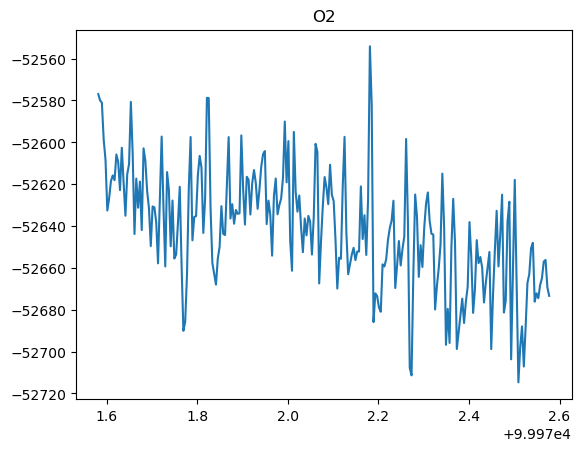

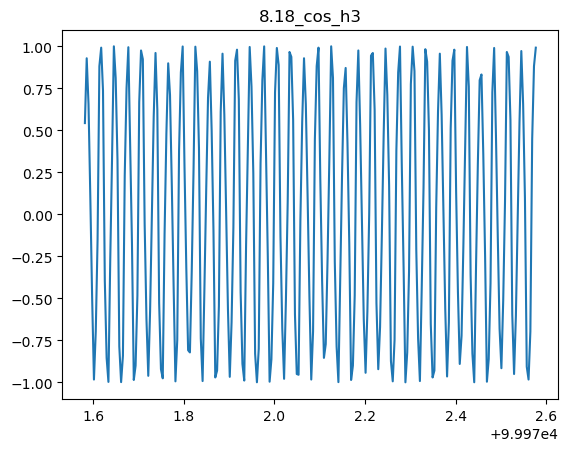

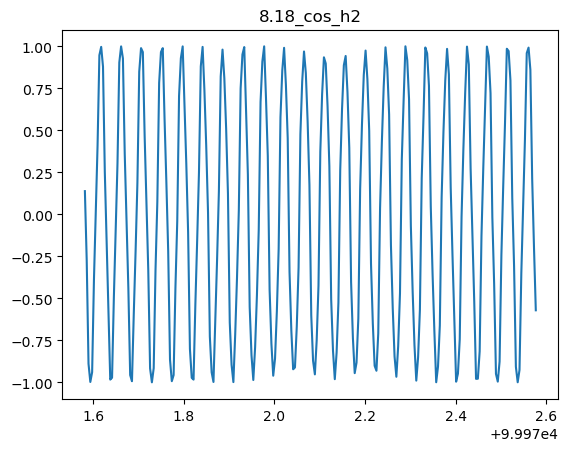

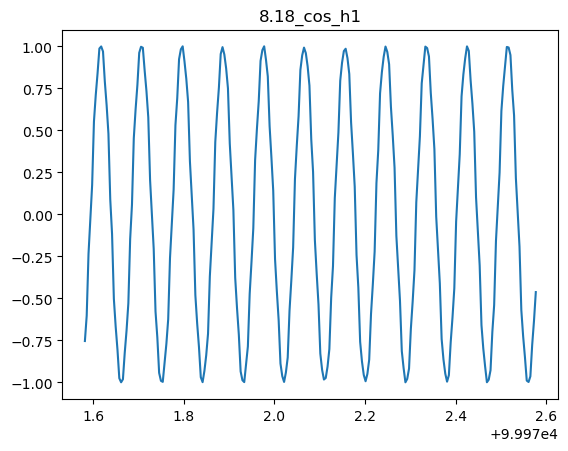

8.18_sin_h1
[[1.         0.32159915]
 [0.32159915 1.        ]]
8.18_cos_h1
[[1.        0.2180836]
 [0.2180836 1.       ]]
8.18_sin_h2
[[1.         0.13337591]
 [0.13337591 1.        ]]
8.18_cos_h2
[[1.         0.26433918]
 [0.26433918 1.        ]]
8.18_sin_h3
[[1.         0.13893656]
 [0.13893656 1.        ]]
8.18_cos_h3
[[1.         0.21882174]
 [0.21882174 1.        ]]
9_sin_h1
[[1.         0.31802948]
 [0.31802948 1.        ]]
9_cos_h1
[[1.         0.30745064]
 [0.30745064 1.        ]]
9_sin_h2
[[1.         0.23304177]
 [0.23304177 1.        ]]
9_cos_h2
[[1.         0.25373337]
 [0.25373337 1.        ]]
9_sin_h3
[[1.         0.13498846]
 [0.13498846 1.        ]]
9_cos_h3
[[1.         0.22270561]
 [0.22270561 1.        ]]
10_sin_h1
[[1.         0.36577337]
 [0.36577337 1.        ]]
10_cos_h1
[[1.        0.2865344]
 [0.2865344 1.       ]]
10_sin_h2
[[1.         0.26307525]
 [0.26307525 1.        ]]
10_cos_h2
[[1.         0.24160961]
 [0.24160961 1.        ]]
10_sin_h3
[[1.        0.14

In [178]:
flip = False
path = '../data/BCISpellerV5/BCISpellerV515_1/'
df_eeg, df_ts_eeg = load_eeg(path)
df_eeg_iir, df_ts_eeg_iir = load_eeg_iir(path)
df_freq, df_ts_freq = load_frequencies(path)
df_eeg_freq, df_ts_eeg_freq = load_eeg_and_freq(path)
chosen_channel = 'O2'

start = 250*4
end = round(250*5)


if True:
    plot_single(df_eeg_freq[start:end], df_ts_eeg_freq[start:end], chosen_channel)
    plot_single(df_eeg_freq[start:end], df_ts_eeg_freq[start:end], '8.18_cos_h3')
    plot_single(df_eeg_freq[start:end], df_ts_eeg_freq[start:end], '8.18_cos_h2')
    plot_single(df_eeg_freq[start:end], df_ts_eeg_freq[start:end], '8.18_cos_h1')


X = df_eeg_iir[start:end][['O1','Oz','O2', 'P3', 'P4', 'Pz', 'P7', 'P8']]
for i in frequencies:
    Y = df_freq[round(start):round(end)][i]
    ca = CCA(n_components=1)
    ca.fit(X, Y)
    X_c, Y_c = ca.transform(X, Y)
    print(i)
    print(np.corrcoef(X_c[:, 0], Y_c[:, 0]))

In [179]:
path = '../data/BCISpellerV5/'
paths = [name for name in os.listdir(path) if "12" in name]
result = []
for name in paths:
    df_eeg, df_ts_eeg = load_eeg(path+name)
    df_eeg_iir, df_ts_eeg_iir = load_eeg_iir(path+name)
    df_freq, df_ts_freq = load_frequencies(path+name)
    df_eeg_freq, df_ts_eeg_freq = load_eeg_and_freq(path+name)
    chosen_channel = 'Oz'
    for i in ['O1','O2','Oz', 'P3','P4', 'Pz', 'P7', 'P8']:
        df_eeg_freq[i] = (df_eeg_freq[i].abs() / df_eeg_freq[i].abs().max())

    for i in frequencies:
        df_eeg_freq[i] = (df_eeg_freq[i].abs() / df_eeg_freq[i].abs().max())
    print(len(df_eeg_freq))
    start = 250*3
    end = round(250*5.25)

    X = df_eeg_freq[start:end][['O1','O2','Oz', 'P3','P4', 'Pz', 'P7', 'P8']]
    print(name)
    freqs = []
    t = 0
    for i in range(0,len(frequencies),6):
        t = t+1
        Y = df_eeg_freq[round(start):round(end)][frequencies[i:6*t]]
        print(Y.shape)
        ca = CCA(n_components=1)
        ca.fit(X, Y)
        X_c, Y_c = ca.transform(X, Y)
        print([np.corrcoef(X_c[:, i], Y_c[:, i])[0, 1] for i in range(1)])
        freqs.append(np.corrcoef(X_c[:, 0], Y_c[:, 0])[0][1])

    result.append(freqs)

df = pd.DataFrame(result, columns=frequencies_main)
df = df.T
df['Mean'] = round(df.loc[:, 0:4].mean(axis=1),3)
display(df)

print(frequencies_main[np.argmax(df['Mean'])])

1222
BCISpellerV512.85_1
(472, 6)
[0.22058588092610554]
(472, 6)
[0.20240310786866744]
(472, 6)
[0.1728577492464442]
(472, 6)
[0.2056767327977897]
(472, 6)
[0.23993518679717707]
(472, 6)
[0.2241708080541617]
958
BCISpellerV512.85_2
(208, 6)
[0.24706505834026968]
(208, 6)
[0.35144317295630395]
(208, 6)
[0.27027559282124114]
(208, 6)
[0.3263857736272552]
(208, 6)
[0.3925654941698649]
(208, 6)
[0.35026626927862337]
1705
BCISpellerV512.85_3
(562, 6)
[0.1881497355259672]
(562, 6)
[0.1580354471160005]
(562, 6)
[0.09546092611964052]
(562, 6)
[0.13101870931261547]
(562, 6)
[0.31084852517218126]
(562, 6)
[0.13175162499038764]
1459
BCISpellerV512.85_4
(562, 6)
[0.17540145809963087]
(562, 6)
[0.1989378742692766]
(562, 6)
[0.16148781212058844]
(562, 6)
[0.11353806488829835]
(562, 6)
[0.22945426652763143]
(562, 6)
[0.14619469310593844]
1219
BCISpellerV512.85_5
(469, 6)
[0.22173429306977677]
(469, 6)
[0.1739078203984528]
(469, 6)
[0.1595489288439855]
(469, 6)
[0.17687597415999184]
(469, 6)
[0.200850

,0,1,2,3,4,Mean
8.18,0.220586,0.247065,0.188150,0.175401,0.221734,0.211
9,0.202403,0.351443,0.158035,0.198938,0.173908,0.217
10,0.172858,0.270276,0.095461,0.161488,0.159549,0.172
11.25,0.205677,0.326386,0.131019,0.113538,0.176876,0.191
12.85,0.239935,0.392565,0.310849,0.229454,0.200850,0.275
15,0.224171,0.350266,0.131752,0.146195,0.147440,0.200


12.85


In [180]:
df_eeg_freq, df_ts_eeg_freq = load_eeg_and_freq(path+'BCISpellerV58.18_1')
for i in ['O1','O2','Oz', 'P3','P4', 'Pz', 'P7', 'P8']:
    df_eeg_freq[i] = (df_eeg_freq[i].abs() / df_eeg_freq[i].abs().max())

for i in frequencies:
    df_eeg_freq[i] = (df_eeg_freq[i].abs() / df_eeg_freq[i].abs().max())
def find_shift(df_eeg_freq, coef_index):
    start = 250*4
    end = round(250*6.25)
    X = df_eeg_freq[start:end][['O1','O2', 'P3','P4', 'Pz', 'P7', 'P8']]
    freqs = []
    t = 0
    shifts = []
    for i in range(250):
        freq = []
        for i in range(0,len(frequencies),6):
            t = t+1
            Y = df_eeg_freq[round(start):round(end)][frequencies[i:6*t]]
            #print(Y.shape)
            ca = CCA(n_components=1)
            ca.fit(X, Y)
            X_c, Y_c = ca.transform(X, Y)
            #print([np.corrcoef(X_c[:, i], Y_c[:, i])[0, 1] for i in range(1)])
            freq.append(np.corrcoef(X_c[:, 0], Y_c[:, 0])[0][1])
        freqs.append(freq)
        df_eeg_freq[frequencies] = df_eeg_freq[frequencies].shift(1)

    return freqs, np.argmax(freqs[:][coef_index])


result, shift = find_shift(df_eeg_freq, 5)

In [189]:
df = pd.DataFrame(result, columns=frequencies_main)
df = df
#df['Mean'] = round(df.loc[:, 0:4].mean(axis=1),3)
display(df['15'].argmax())
display(df.iloc[66])

66

8.18     0.402534
9        0.401230
10       0.394532
11.25    0.393740
12.85    0.392818
15       0.188079
Name: 66, dtype: float64